# Pandas vs Dask
### Data processing with Python Pandas vs Dask: an introduction

<br/>Dr Sergio Pintaldi, Data Science Software Engineer
<br/>SIH, University of Sydney

<br/>↓↓↓↓ Slides and code below ↓↓↓↓

[https://github.com/srggrs/ResBaz](https://github.com/srggrs/ResBaz)

## Agenda

### Pandas Quickstart
* Pandas load a CSV
* Pandas operations on Dataframe

### Dask Intro
* Dask delayed and data structures 

### Examples
* Example: read mutliple CSVs
* Example: read huge data (out of RAM ?)

### Final Remarks

## Pandas Basics

Loading a CSV

In [1]:
import pandas as pd
from datasetup import waves_data
file_name = waves_data()

Waves data set already present


In [2]:
df = pd.read_csv(file_name)

Display the top rows (5 rows)

In [3]:
df.head()

,Date/Time,Hs,Hmax,Tz,Tp,Dir_Tp TRUE,SST
0,2000-04-20T01:00:00,1.2187,2.00,4.5188,9.8188,0.0,0.0
1,2000-04-20T02:00:00,1.2308,2.06,4.9427,9.7123,0.0,0.0
2,2000-04-20T03:00:00,1.1922,1.90,4.6522,9.4239,0.0,0.0
3,2000-04-20T04:00:00,1.0237,1.94,4.4768,10.3511,0.0,0.0
4,2000-04-20T05:00:00,1.1321,1.86,5.0083,9.8242,0.0,0.0


Selection of rows and columns

In [4]:
df['Hmax']

0         2.00
1         2.06
2         1.90
3         1.94
4         1.86
          ... 
235703    2.10
235704    1.74
235705    1.75
235706    2.01
235707    1.94
Name: Hmax, Length: 235708, dtype: float64

In [5]:
# displaying only top rows for convenience
df[['Hmax', 'Hs']].head()

,Hmax,Hs
0,2.00,1.2187
1,2.06,1.2308
2,1.90,1.1922
3,1.94,1.0237
4,1.86,1.1321


Advanced selection

In [6]:
df.loc[df['Hmax'] > 2, ['Hmax','Hs']].head()

,Hmax,Hs
1,2.06,1.2308
7,2.18,1.2218
8,2.16,1.0834
13,2.09,1.0368
15,2.02,1.0960


##### Explanation
```python
df.loc[ROWS, COLUMNS]
df.loc[df['Hmax'] > 2, ['Hmax','Hs']]
```
Select colmuns 'Hmax','Hs' where Hmax > 2

In [7]:
# inspecting the selection criteria
df['Hmax'] > 2

0         False
1          True
2         False
3         False
4         False
          ...  
235703     True
235704    False
235705    False
235706     True
235707    False
Name: Hmax, Length: 235708, dtype: bool

# Dask

> "Dask is a flexible parallel computing library for analytic computing written in Python"

Another Spark/Hadoop?

## Dask data structures

### Dask Array
```python
import h5py
# Numpy
import numpy as np
f = h5py.File('myfile.hdf5')
x = np.array(f['/small-data'])
x - x.mean(axis=1)

# Dask
import dask.array as da
x = da.from_array(f['/big-data'], chunks=(1000, 1000))
x - x.mean(axis=1).compute()
```

### Dask DataFrame
```python
import h5py
# Numpy
import pandas as pd
df = pd.read_csv('2015-01-01.csv')
df.groupby(df.user_id).value.mean()

# Dask
import dask.dataframe as dd
df = dd.read_csv('2015-*-*.csv')
df.groupby(df.user_id).value.mean().compute()
```

### Dask Bag (for everything else)
```python
import json
import dask.bag as db
b = db.read_text('2015-*-*.json.gz').map(json.loads)
```

### Delayed Functions
```python
def foo(x):
    # do something
    return

del_obj = delayed(foo)(input)
```

## Example: Pandas vs Dask on multiple CSVs
Data set: US flights data

#### Objective
Display *average flight delay* over the years

In [11]:
from datasetup import flights
fnames = flights()

** Finished! **


#### First lines
First lines of every file
Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted 1991,1,8,2,1215.0,1215,1340.0,1336,US,121,,85.0,81,,4.0,0.0,EWR,PIT,319.0,,,0,0 1991,1,9,3,1215.0,1215,1353.0,1336,US,121,,98.0,81,,17.0,0.0,EWR,PIT,319.0,,,0,0

In [19]:
fnames[:5]

['/home/srg/Documents/Collaborations/ResBaz/code/2019/data/nycflights/1996.csv',
 '/home/srg/Documents/Collaborations/ResBaz/code/2019/data/nycflights/1993.csv',
 '/home/srg/Documents/Collaborations/ResBaz/code/2019/data/nycflights/1999.csv',
 '/home/srg/Documents/Collaborations/ResBaz/code/2019/data/nycflights/1998.csv',
 '/home/srg/Documents/Collaborations/ResBaz/code/2019/data/nycflights/1991.csv']

In [21]:
pd.read_csv(fnames[0]).head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1996,1,1,1,930.0,930,1304.0,1307,CO,1645,...,316.0,-3.0,0.0,EWR,PHX,2133,3,15,0,0
1,1996,1,2,2,946.0,930,1312.0,1307,CO,1645,...,290.0,5.0,16.0,EWR,PHX,2133,4,32,0,0
2,1996,1,3,3,1149.0,930,1544.0,1307,CO,1645,...,296.0,157.0,139.0,EWR,PHX,2133,6,53,0,0
3,1996,1,4,4,937.0,930,1329.0,1307,CO,1645,...,324.0,22.0,7.0,EWR,PHX,2133,5,23,0,0
4,1996,1,5,5,935.0,930,1344.0,1307,CO,1645,...,329.0,37.0,5.0,EWR,PHX,2133,6,34,0,0
5,1996,1,6,6,933.0,930,1323.0,1307,CO,1645,...,325.0,16.0,3.0,EWR,PHX,2133,8,17,0,0
6,1996,1,7,7,928.0,930,1320.0,1307,CO,1645,...,277.0,13.0,-2.0,EWR,PHX,2133,5,70,0,0
7,1996,1,8,1,NaN,930,NaN,1307,CO,1645,...,NaN,NaN,NaN,EWR,PHX,2133,0,0,1,0
8,1996,1,9,2,NaN,930,NaN,1307,CO,1645,...,NaN,NaN,NaN,EWR,PHX,2133,0,0,1,0
9,1996,1,10,3,1007.0,930,NaN,1307,CO,1645,...,NaN,NaN,37.0,EWR,PHX,2133,0,21,0,1


Let's plot the average flight delays over the years with __Pandas__

In [16]:
import pandas as pd
%matplotlib inline

CPU times: user 7.63 s, sys: 2.55 s, total: 10.2 s
Wall time: 5.19 s


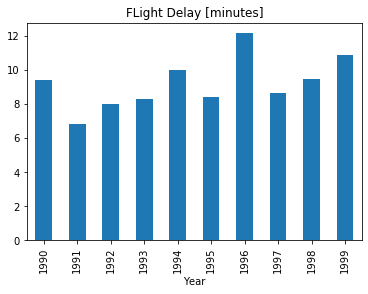

In [17]:
%%time
df_delays = pd.DataFrame()
for fname in fnames:
    df = pd.read_csv(fname, usecols=['Year','DepDelay'])
    df_delays = df_delays.append(df)

df_delays.groupby('Year')['DepDelay'].mean().plot.bar(title='FLight Delay [minutes]')

And then with Dask

In [14]:
import dask.dataframe as dd

CPU times: user 7.56 s, sys: 1.44 s, total: 9 s
Wall time: 2.71 s


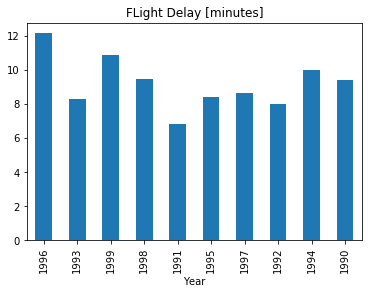

In [18]:
%%time
ddf = dd.read_csv(fnames, usecols=['Year','DepDelay'])
ddf.groupby('Year')['DepDelay'].mean().compute().plot.bar(title='FLight Delay [minutes]')

Almost half time!!! WOooooooWWWWW!

Let's see why

In [7]:
ddf

,Year,DepDelay
npartitions=10,,
,int64,float64
,...,...
...,...,...
,...,...
,...,...


In [8]:
len(fnames)

10

It looks like a dataframe with 10 partitions, which match the 10 files. Also what's the output below
>Dask Name: from-delayed, 30 tasks?

Let's have a look

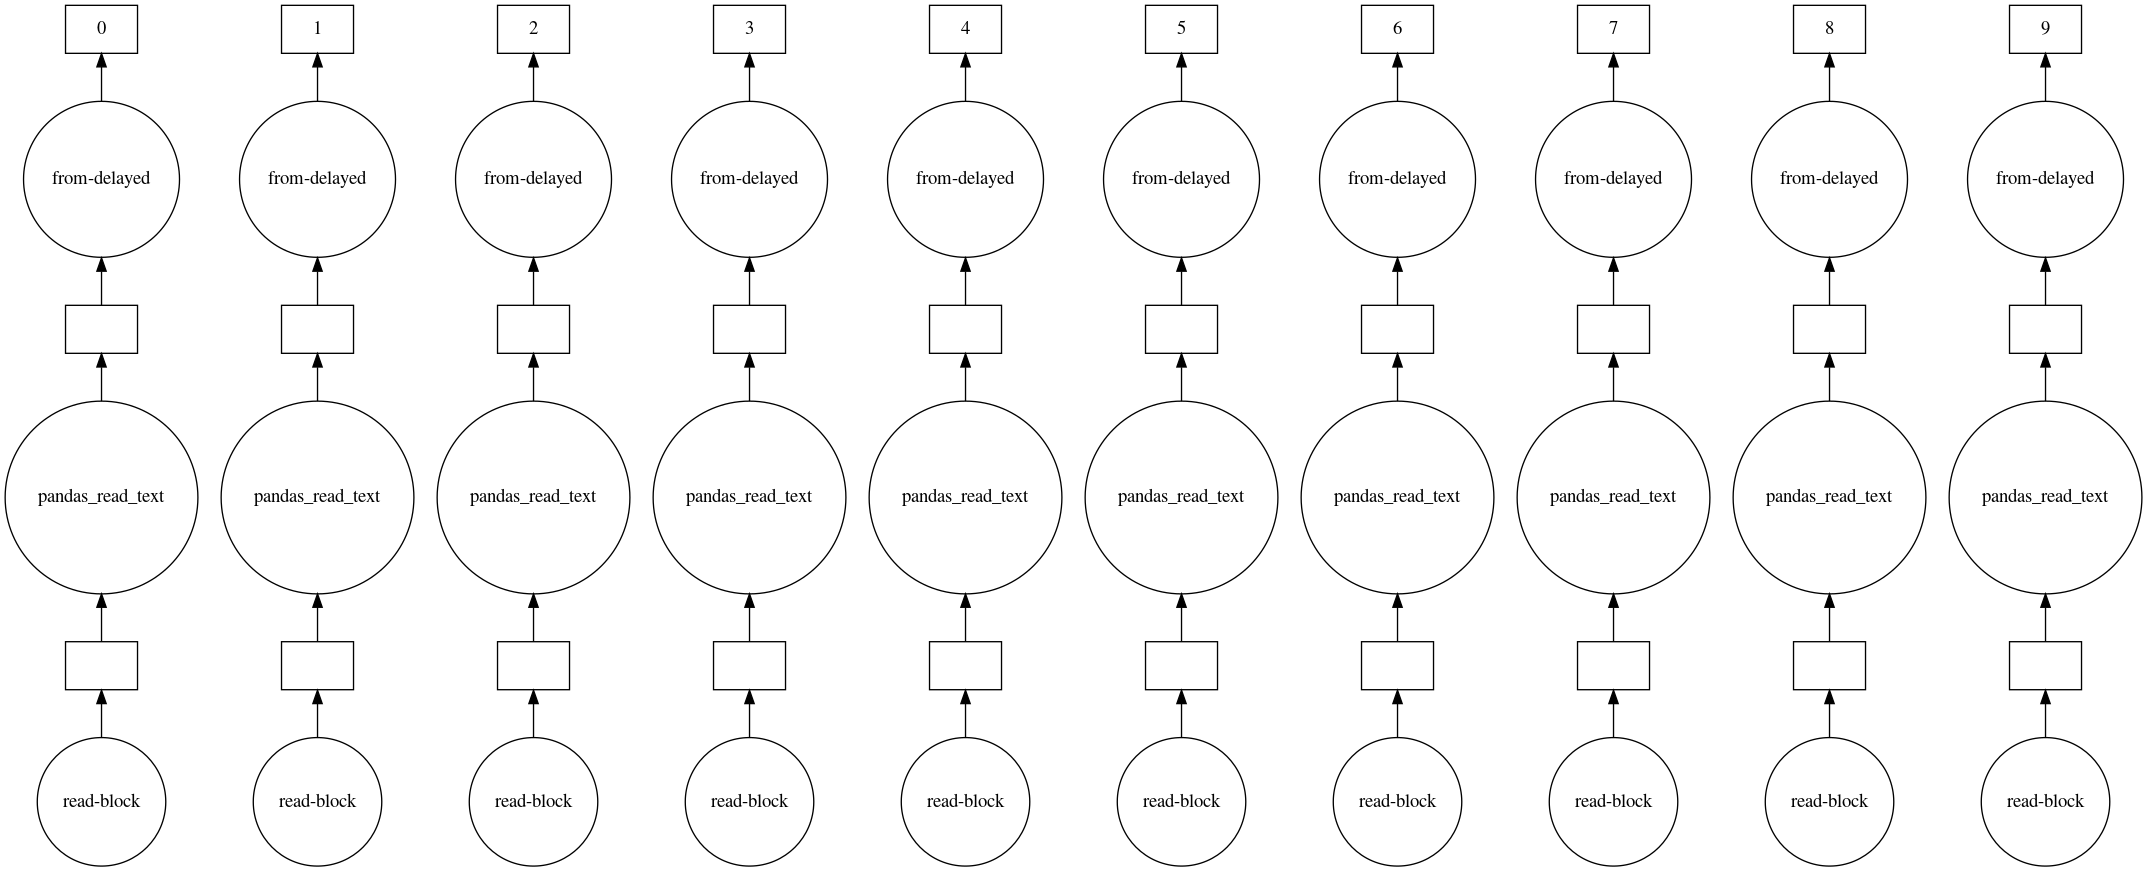

In [9]:
ddf.visualize()

In [10]:
out = ddf.groupby('Year')['DepDelay'].mean()
out

Dask Series Structure:
npartitions=1
    float64
        ...
Name: DepDelay, dtype: float64
Dask Name: truediv, 57 tasks

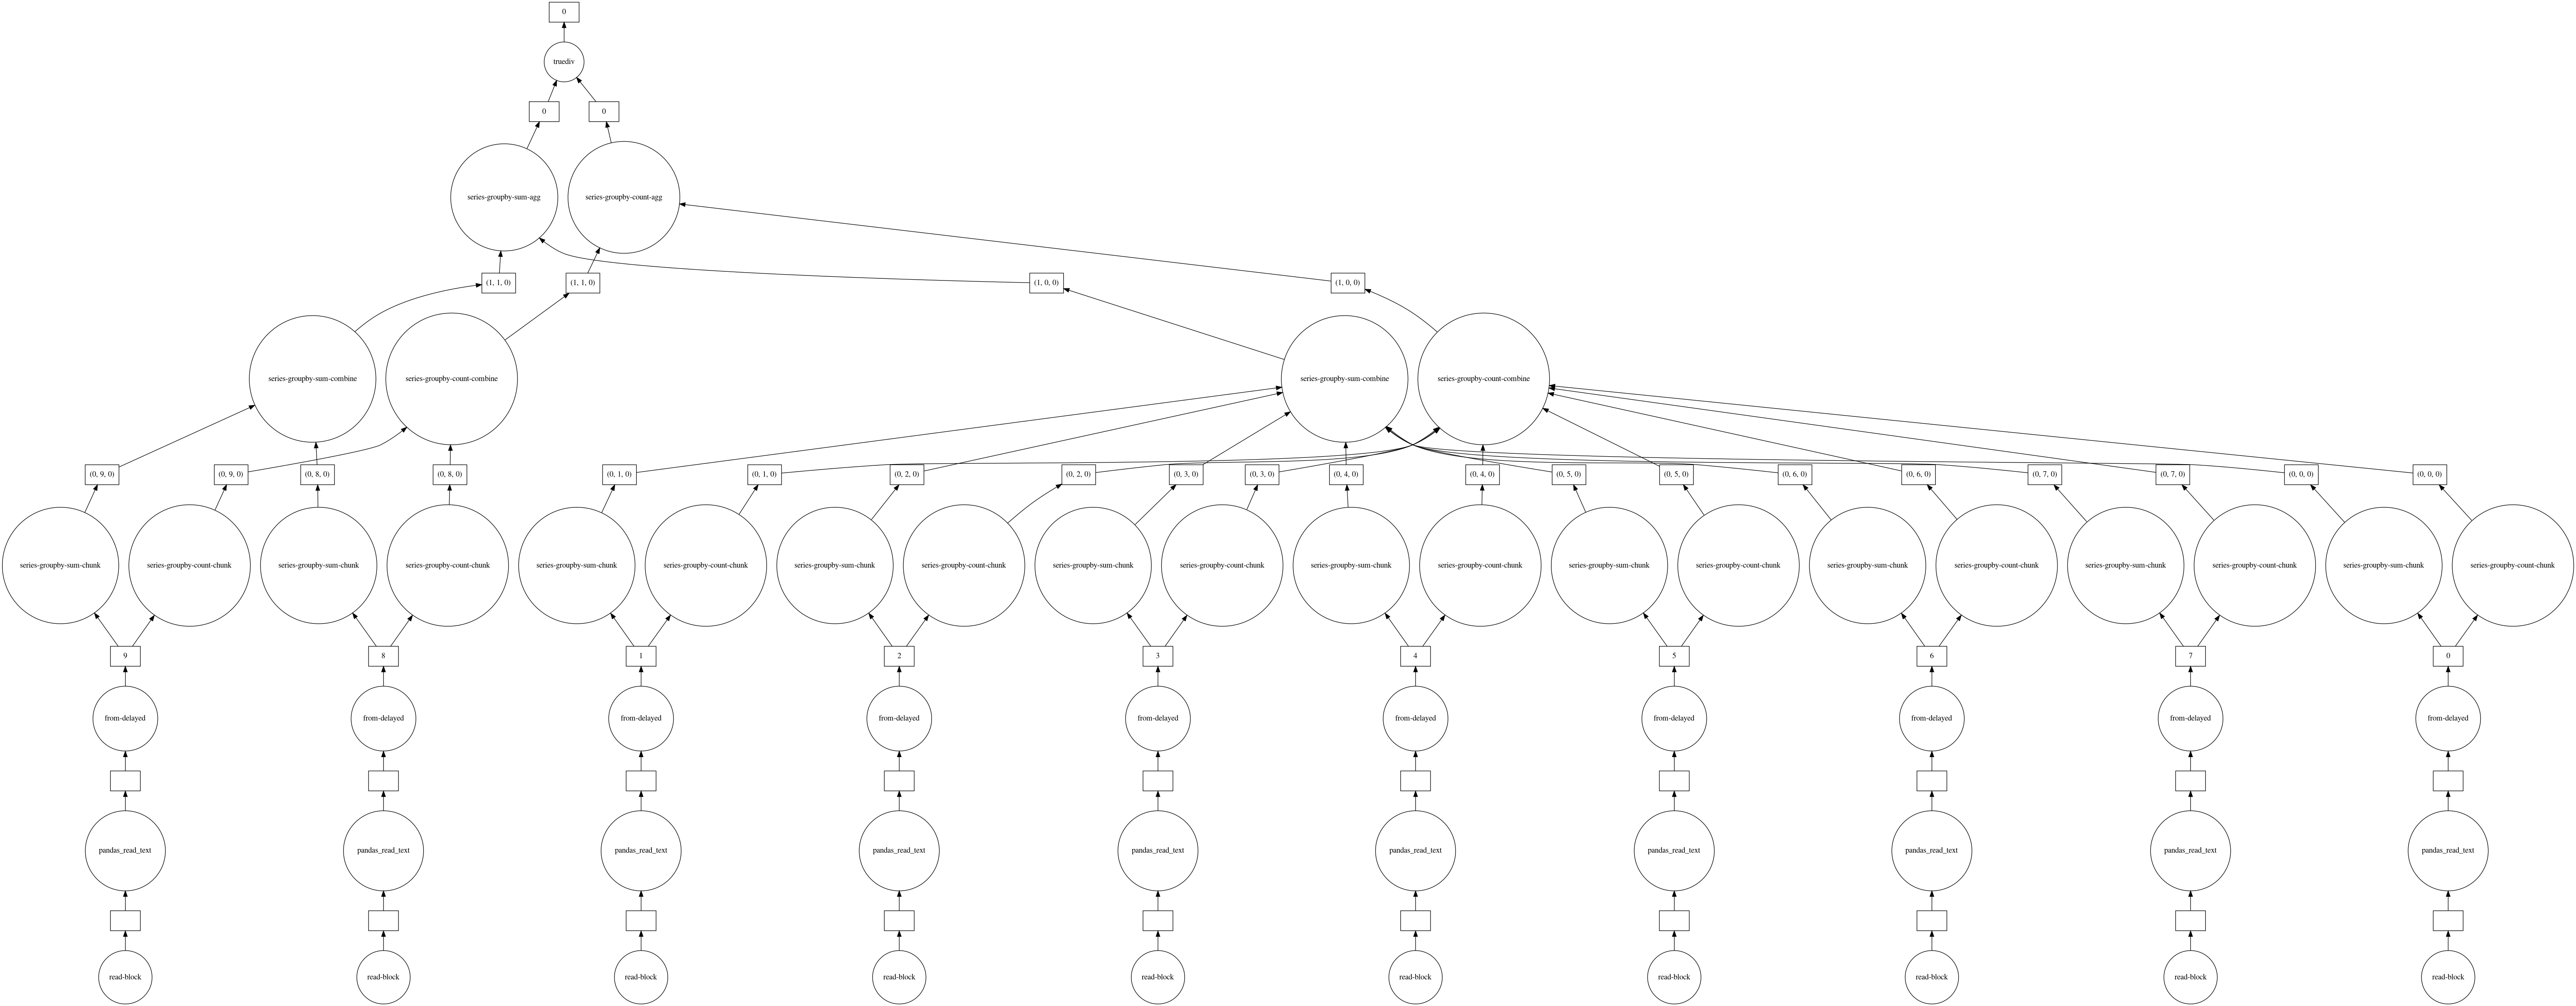

In [11]:
out.visualize()

In [12]:
out = out.compute()

In [13]:
out.head()

Year
1996    12.158599
1993     8.267068
1999    10.886870
1998     9.460770
1991     6.838398
Name: DepDelay, dtype: float64

#### Dask workflow
1. Write operations (e.g. read, group, apply ...)
```python
ddf = (
    dd.read_csv(fnames, usecols=['Year','DepDelay'])
    .groupby('Year')['DepDelay']
    .mean()
)
```
2. Compute the Direct Acyclic Graph (DAG)
```python
ddf.visualize()
```
3. Run actual computation ( `compute()` - automatically compute and optimize DAG)
```python
out_df = ddf.compute()
```

## Final Remarks

### Pandas
* great for small datasets (ideally size < computer RAM)
* more functions
* faster for in memory data

### Dask
* Cluster + Workers
* Realtime Streams and Queues
* Dask is designed to work on a single machine, and on a cluster with the same syntax.
* It performs out-of-core computing (i.e. working on larger than memory data sets) using an approach similar to Spark, by lazily constructing directed acyclic graph (DAG) of tasks and splitting them into small portions
* great to parallelize operations (e.g. multiple files)

# Thank you!

#### ↓↓↓↓ Slides and code below ↓↓↓↓

[https://github.com/srggrs/ResBaz](https://github.com/srggrs/ResBaz)